# Multithreading
1. single thread - can execute one task at a time
2. multiple thread - can excute muliple functions simultaneously

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

## Time.sleep 
code will be idle for given seconds

In [2]:
import time

In [4]:
%%time
time.sleep(3)
print("Hello")
time.sleep(2)
print("ETLHive!")

Hello
ETLHive!
CPU times: total: 0 ns
Wall time: 5 s


### 2 different functions

In [5]:
import math

In [9]:
def hypotenuse(a, b):
    print("Hypotenuse function started")
    time.sleep(2)
    c = math.sqrt(a**2 + b**2)
    print(f"Hypotenuse of sides {a} and {b} is {c:.4f}")
    print("Hypotenuse function completed")

In [10]:
def simple_interest(p, n, r):
    print("Simple Interest function started")
    time.sleep(3)
    i = (p * n * r) / 100
    a = p + i
    print(f"Simple Interest : {i:.2f} INR")
    print(f"Amount : {a:.2f} INR")
    print("Simple Interest function complete")

In [11]:
%%time
hypotenuse(12, 13)

Hypotenuse function started
Hypotenuse of sides 12 and 13 is 17.6918
Hypotenuse function completed
CPU times: total: 0 ns
Wall time: 2.01 s


In [12]:
%%time
simple_interest(p=10000, n=3, r=6.5)

Simple Interest function started
Simple Interest : 1950.00 INR
Amount : 11950.00 INR
Simple Interest function complete
CPU times: total: 0 ns
Wall time: 3 s


### Single Thread execution

In [13]:
%%time
hypotenuse(3, 4)
simple_interest(p=25000, n=4, r=7.1)

Hypotenuse function started
Hypotenuse of sides 3 and 4 is 5.0000
Hypotenuse function completed
Simple Interest function started
Simple Interest : 7100.00 INR
Amount : 32100.00 INR
Simple Interest function complete
CPU times: total: 15.6 ms
Wall time: 5.01 s


### Multithreading

In [16]:
from threading import Thread

In [18]:
%%time
# Create different threads for each function
th1 = Thread(target=hypotenuse, args=(11, 12))
th2 = Thread(target=simple_interest, args=(50000, 5, 7.5))

# Start all the threads simultaneously
th1.start()
th2.start()

# Wait for all threads to finish
th1.join()
th2.join()

Hypotenuse function started
Simple Interest function started
Hypotenuse of sides 11 and 12 is 16.2788
Hypotenuse function completed
Simple Interest : 18750.00 INR
Amount : 68750.00 INR
Simple Interest function complete
CPU times: total: 15.6 ms
Wall time: 3.13 s


### Single function but want to calculate multiple values

In [19]:
def square(n):
    time.sleep(1)
    s = n**2
    print(f"Square of number {n} is {s}")

In [20]:
%%time
square(5)

Square of number 5 is 25
CPU times: total: 15.6 ms
Wall time: 1 s


In [21]:
a = [2, 3, 4, 5, 6, 7, 8]
len(a)

7

### Single threaded execution using for loop

In [22]:
%%time
for i in a:
    square(i)

Square of number 2 is 4
Square of number 3 is 9
Square of number 4 is 16
Square of number 5 is 25
Square of number 6 is 36
Square of number 7 is 49
Square of number 8 is 64
CPU times: total: 15.6 ms
Wall time: 7.02 s


### Mutithreaded Excution

In [24]:
def square_multi(nums: list):
    # Create a blank list for storing all threads
    threads = []

    # Create all threads and start
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [25]:
a

[2, 3, 4, 5, 6, 7, 8]

In [26]:
%%time
square_multi(a)

Square of number 2 is 4
Square of number 4 is 16
Square of number 3 is 9
Square of number 8 is 64
Square of number 7 is 49
Square of number 6 is 36
Square of number 5 is 25
CPU times: total: 0 ns
Wall time: 1.02 s


In [29]:
b = list(range(1, 100))
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [31]:
%%time
square_multi(b)

Square of number 1 is 1Square of number 3 is 9
Square of number 2 is 4
Square of number 7 is 49
Square of number 6 is 36
Square of number 5 is 25
Square of number 4 is 16
Square of number 8 is 64

Square of number 9 is 81
Square of number 11 is 121
Square of number 10 is 100
Square of number 12 is 144
Square of number 13 is 169
Square of number 14 is 196
Square of number 15 is 225
Square of number 16 is 256
Square of number 17 is 289
Square of number 18 is 324
Square of number 19 is 361
Square of number 20 is 400
Square of number 21 is 441
Square of number 23 is 529
Square of number 22 is 484
Square of number 25 is 625
Square of number 24 is 576
Square of number 26 is 676
Square of number 27 is 729
Square of number 28 is 784
Square of number 30 is 900
Square of number 29 is 841
Square of number 31 is 961
Square of number 32 is 1024
Square of number 34 is 1156
Square of number 33 is 1089
Square of number 35 is 1225
Square of number 36 is 1296
Square of number 37 is 1369
Square of number

### Download multiple files simulaneously

In [32]:
url = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [33]:
url.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [34]:
url.split("/")[-1]

'data.csv'

In [35]:
from urllib.request import urlretrieve

In [36]:
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} download started ...")
    urlretrieve(url, filename)
    print(f"{filename} download complete!")

In [38]:
url

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv'

In [39]:
%%time
download_file(url)

data.csv download started ...
data.csv download complete!
CPU times: total: 297 ms
Wall time: 2.59 s


### Downloading multiple files

In [40]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv",
]

In [41]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [42]:
%%time
for i in urls:
    download_file(i)

data.csv download started ...
data.csv download complete!
test.csv download started ...
test.csv download complete!
train.csv download started ...
train.csv download complete!
CPU times: total: 266 ms
Wall time: 2.77 s


### Multithreading

In [43]:
def download_multi(urls: list):
    # Create a blank threads list
    threads = []

    # Create and start all threads
    for i in urls:
        th = Thread(target=download_file, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [44]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [45]:
%%time
download_multi(urls)

data.csv download started ...
test.csv download started ...
train.csv download started ...
test.csv download complete!
data.csv download complete!
train.csv download complete!
CPU times: total: 328 ms
Wall time: 2.55 s


### Loading the csv files

In [46]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [47]:
df.shape

(193573, 11)

In [48]:
df2 = pd.read_csv("test.csv")
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14,1355
1,165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89,14691
2,96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52,844
3,145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71,707
4,118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23,5797


In [49]:
df2.shape

(38715, 11)

In [52]:
df3 = pd.read_csv("train.csv")
df3.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,83475,0.32,Premium,E,SI1,61.6,58.0,4.38,4.41,2.71,614
1,160324,1.20,Premium,F,VS2,62.6,57.0,6.81,6.76,4.25,7002
2,101740,1.50,Ideal,I,VS2,62.2,55.0,7.30,7.26,4.53,9347
3,180341,1.67,Premium,I,SI2,61.9,59.0,7.65,7.61,4.71,8525
4,48480,1.00,Good,H,VS2,63.7,60.0,6.34,6.30,4.02,5217


In [53]:
df3.shape

(154858, 11)

In [54]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [57]:
c = (
    df.groupby(by="cut")
    .agg({"price": "mean"})
    .sort_values(by="price", ascending=False)
    .round(2)
)

In [58]:
c

,price
cut,
Fair,4810.50
Premium,4797.06
Good,4191.47
Very Good,4165.30
Ideal,3396.19


<Axes: xlabel='cut'>

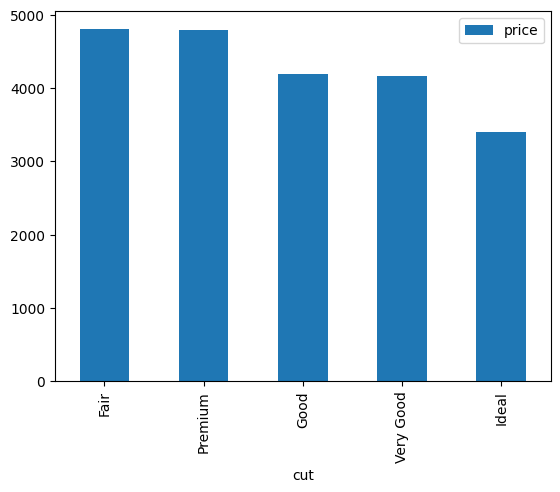

In [59]:
c.plot(kind="bar")